# Primary Data Exploration Chicago Energy Benchmarking Dataset

**Author:** Kiki Mei  
**Date:** October 14, 2025    
**Data Source:** Chicago Energy Benchmarking Dataset (2014-2023) - City of Chicago Open Data Portal  

## Summary

This notebook loaded and explored the merged Chicago Energy Benchmarking dataset covering 2014-2023. 
The analysis includes missing data assessment, descriptive statistics by year, and visualization of energy efficiency trends to evaluate policy effectiveness. Initial findings suggest improved energy performance, particularly with decreasing Site EUI observed from 2020 onward.

## Part 1: Load Preprocessed Data 

First we load in the dataset we've merged. This assumes that data_utils.py found in /project/src/utils/ has already run and output the filtered dataframe with concurrent buildings start from 2016.

In [1]:
# load in local helper functions
from utils.data_utils import concurrent_buildings, load_data

In [2]:
# Load the data loader function
data = load_data()
energy_data = concurrent_buildings(data, 2016, 2023)

# Print basic information
print(
    f"Loaded dataset with {energy_data.shape[0]:,} rows and {energy_data.shape[1]} columns."
)
energy_data.head()

Loaded dataset with 18,904 rows and 30 columns.


,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,...,Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Reporting Status,Chicago Energy Rating,Exempt From Chicago Energy Rating,Water Use (kGal),Row_ID
24486,2016,116336,lasalle private residences,1212 N LaSalle,60610,near north side,multifamily housing,367627.0,1986.0,1.0,...,2575.3,7.0,41.904201,-87.633825,point (-87.63382507 41.90420084),nan,NaN,nan,NaN,nan
24496,2016,101745,161 north clark,161 North Clark,60601,loop,office,1200836.0,1992.0,1.0,...,15498.4,12.9,41.884905,-87.630518,point (-87.6305179 41.88490511),nan,NaN,nan,NaN,nan
24495,2016,101448,1401 w roosevelt - 2017 resubmit,1401 W. Roosevelt,60608,near west side,multifamily housing,69385.0,2006.0,1.0,...,242.4,3.5,41.849153,-87.670896,point (-87.67089596 41.84915346),nan,NaN,nan,NaN,nan
24494,2016,159892,promontory corporation,5530-5532 S Shore Drive,60637,hyde park,multifamily housing,180351.0,1949.0,1.0,...,1317.3,7.3,41.794687,-87.580465,point (-87.58046479 41.794687),nan,NaN,nan,NaN,nan
24493,2016,103602,190 south lasalle,190 South LaSalle,60603,loop,office,882560.0,1985.0,1.0,...,11519.9,13.1,41.879756,-87.632687,point (-87.63268685 41.8797561),nan,NaN,nan,NaN,nan


To make sure the data.py works well, check the data types of the numeric columns relevant to the research questions we are interested in. For instance, Chicago Energy Rating, Water Use (kGal), Electricity Use (kBtu), Site EUI (kBtu/sq ft), Source EUI (kBtu/sq ft), etc.

In [19]:
# Check the data types and information
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18904 entries, 24486 to 26044
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Data Year                                   18904 non-null  int64  
 1   ID                                          18904 non-null  int64  
 2   Property Name                               18904 non-null  object 
 3   Address                                     18904 non-null  object 
 4   ZIP Code                                    18904 non-null  object 
 5   Community Area                              18904 non-null  object 
 6   Primary Property Type                       18904 non-null  object 
 7   Gross Floor Area - Buildings (sq ft)        17826 non-null  float64
 8   Year Built                                  16980 non-null  float64
 9   # of Buildings                              17031 non-null  float64
 10  ENERGY

## Part 2: Generate Descriptive Statistics

Now, we will explore the merged dataframe energy_data with usable data types. We will use the summarize_missing_by_year, generate_descriptive_stats, and generate_descriptive_stats_by_year functions defined in utils/stats_generator.py to generate dataframes for descriptive statistics.

In [ ]:
# load in local helper functions
from utils.stats_utils import (
    generate_descriptive_stats,
    generate_descriptive_stats_by_year,
    summarize_missing_by_year,
)

First we will check the missing data for each column grouped by year.

In [65]:
missing_summary = summarize_missing_by_year(energy_data)
display(missing_summary.head(10))

,Year,Column,Missing Values,% Missing
6,2014,Chicago Energy Rating,243,100.00
7,2014,Exempt From Chicago Energy Rating,243,100.00
13,2014,Water Use (kGal),243,100.00
17,2014,District Steam Use (kBtu),231,95.06
19,2014,All Other Fuel Use (kBtu),228,93.83
18,2014,District Chilled Water Use (kBtu),212,87.24
16,2014,Natural Gas Use (kBtu),72,29.63
14,2014,ENERGY STAR Score,43,17.70
22,2014,Weather Normalized Site EUI (kBtu/sq ft),13,5.35
23,2014,Weather Normalized Source EUI (kBtu/sq ft),13,5.35


Since the missing_summary is grouped by year, we could compare the missing data for each year.

In [ ]:
YEAR_2014 = 2014
YEAR_2019 = 2019

missing_2014 = missing_summary[missing_summary["Year"] == YEAR_2014]
missing_2019 = missing_summary[missing_summary["Year"] == YEAR_2019]

# Merge side by side for comparison
compare = missing_2014.merge(
    missing_2019, on="Column", how="outer", suffixes=("_2014", "_2019")
)
compare.head(10)

,Year_2014,Column,Missing Values_2014,% Missing_2014,Year_2019,Missing Values_2019,% Missing_2019
0,2014,Chicago Energy Rating,243,100.00,2019,215,6.25
1,2014,Exempt From Chicago Energy Rating,243,100.00,2019,0,0.00
2,2014,Water Use (kGal),243,100.00,2019,3123,90.84
3,2014,District Steam Use (kBtu),231,95.06,2019,3361,97.76
4,2014,All Other Fuel Use (kBtu),228,93.83,2019,3438,100.00
5,2014,District Chilled Water Use (kBtu),212,87.24,2019,3363,97.82
6,2014,Natural Gas Use (kBtu),72,29.63,2019,1373,39.94
7,2014,ENERGY STAR Score,43,17.70,2019,1545,44.94
8,2014,Weather Normalized Site EUI (kBtu/sq ft),13,5.35,2019,2078,60.44
9,2014,Weather Normalized Source EUI (kBtu/sq ft),13,5.35,2019,3438,100.00


Next, we will display the descriptive statistics for the relevant core columns.

In [72]:
desc_all = generate_descriptive_stats(energy_data)
display(desc_all)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Data Year,25612.0,NaN,NaN,NaN,2019.739888,2.307059,2014.0,2018.0,2020.0,2022.0,2023.0
Chicago Energy Rating,19406.0,NaN,NaN,NaN,2.214521,1.526616,0.0,1.0,2.5,4.0,4.0
Exempt From Chicago Energy Rating,17966,2,False,16324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENERGY STAR Score,17337.0,NaN,NaN,NaN,58.605526,27.168911,1.0,38.0,62.0,81.0,100.0
Site EUI (kBtu/sq ft),20182.0,NaN,NaN,NaN,97.036538,231.840322,0.1,60.325,78.25,100.8,15634.5
Source EUI (kBtu/sq ft),19323.0,NaN,NaN,NaN,170.140801,270.957458,0.2,105.7,135.2,179.1,16485.4
Weather Normalized Site EUI (kBtu/sq ft),19102.0,NaN,NaN,NaN,98.813119,202.412208,0.1,62.7,81.65,104.6,14392.8
Weather Normalized Source EUI (kBtu/sq ft),17742.0,NaN,NaN,NaN,170.047244,215.219411,0.2,109.5,139.0,181.4,11802.4
Total GHG Emissions (Metric Tons CO2e),19041.0,NaN,NaN,NaN,2473.234762,6022.696556,0.0,540.7,1013.6,2273.2,185162.1
GHG Intensity (kg CO2e/sq ft),19036.0,NaN,NaN,NaN,9.182797,14.162988,0.0,5.5,7.1,9.8,834.9


As descriptive statistics for columns across 2014-2023 is too noisy and disturbed by the energy level before and after the placard system, we should see the descriptive stats grouped by year, using the function generate_descriptive_stats_by_year.

In [87]:
# Descriptive stats per year
desc_by_year = generate_descriptive_stats_by_year(energy_data)
display(desc_by_year.head(16))

Data Year                          2014    2015    2017         2018  \
Variable              Statistic                                        
Data Year             count       243.0  1521.0  2797.0  3430.000000   
                      mean       2014.0  2015.0  2017.0  2018.000000   
                      std           0.0     0.0     0.0     0.000000   
                      min        2014.0  2015.0  2017.0  2018.000000   
                      25%        2014.0  2015.0  2017.0  2018.000000   
                      50%        2014.0  2015.0  2017.0  2018.000000   
                      75%        2014.0  2015.0  2017.0  2018.000000   
                      max        2014.0  2015.0  2017.0  2018.000000   
Chicago Energy Rating count         0.0     0.0     0.0  3108.000000   
                      mean          NaN     NaN     NaN     2.324163   
                      std           NaN     NaN     NaN     1.411897   
                      min           NaN     NaN     NaN     0.000000   
                      25%           NaN     NaN     NaN     1.000000   
                      50%           NaN     NaN     NaN     2.500000   
                      75%           NaN     NaN     NaN     4.000000   
                      max           NaN     NaN     NaN     4.000000   

Data Year                               2019         2020         2021  \
Variable              Statistic                                          
Data Year             count      3438.000000  3582.000000  3550.000000   
                      mean       2019.000000  2020.000000  2021.000000   
                      std           0.000000     0.000000     0.000000   
                      min        2019.000000  2020.000000  2021.000000   
                      25%        2019.000000  2020.000000  2021.000000   
                      50%        2019.000000  2020.000000  2021.000000   
                      75%        2019.000000  2020.000000  2021.000000   
                      max        2019.000000  2020.000000  2021.000000   
Chicago Energy Rating count      3223.000000  3408.000000  3254.000000   
                      mean          1.786534     2.543721     2.245083   
                      std           1.572146     1.482060     1.555787   
                      min           0.000000     0.000000     0.000000   
                      25%           0.000000     1.000000     1.000000   
                      50%           1.500000     3.000000     2.500000   
                      75%           3.500000     4.000000     4.000000   
                      max           4.000000     4.000000     4.000000   

Data Year                               2022         2023  
Variable              Statistic                            
Data Year             count      3613.000000  3438.000000  
                      mean       2022.000000  2023.000000  
                      std           0.000000     0.000000  
                      min        2022.000000  2023.000000  
                      25%        2022.000000  2023.000000  
                      50%        2022.000000  2023.000000  
                      75%        2022.000000  2023.000000  
                      max        2022.000000  2023.000000  
Chicago Energy Rating count      3328.000000  3085.000000  
                      mean          2.111929     2.265964  
                      std           1.548151     1.473119  
                      min           0.000000     0.000000  
                      25%           1.000000     1.000000  
                      50%           2.000000     2.500000  
                      75%           3.500000     3.500000  
                      max           4.000000     4.000000

We could look more specifically at the change of descriptive statistics of a column during the period 2014-2023.

In [90]:
# View stats for one metric across years
display(desc_by_year.loc["Site EUI (kBtu/sq ft)"])

Data Year,2014,2015,2017,2018,2019,2020,2021,2022,2023
Statistic,,,,,,,,,
count,243.000000,1521.000000,2761.000000,2783.000000,2243.000000,2910.000000,2576.000000,2562.000000,2583.000000
mean,108.979424,120.251348,92.282470,109.164391,111.145698,90.992337,91.488199,89.597619,81.726868
std,72.867561,365.301744,69.656722,375.059536,350.723891,180.327971,181.877563,66.296432,49.599856
min,33.000000,3.500000,0.200000,0.400000,0.200000,0.100000,2.100000,3.700000,7.100000
25%,69.000000,64.300000,61.600000,64.650000,63.300000,57.600000,57.475000,59.725000,56.650000
50%,88.000000,83.100000,79.400000,84.900000,83.900000,74.900000,73.700000,78.500000,72.300000
75%,112.000000,107.900000,100.800000,108.100000,109.200000,96.000000,95.600000,100.800000,92.300000
max,491.000000,8059.600000,1692.700000,15634.500000,14680.600000,8626.100000,8332.400000,1440.900000,965.700000


It could see a trend of decreasing mean Site EUI (kBtu/sq ft) started from 2020, where the level of property's Site Energy Use divided by its gross floor area remains below 100, fluctuated from 92 to 82.

## Part 3: Visualize Key Patterns

Next we will visualize the key patterns of key metrics (eg: Site EUI, Source EUI, GHG Intensity, Electricity Use, Natural gas Use). We will use the functions plot_facet_histograms_by_year and plot_trend_by_year defined in utils/visualizer.py to see the distributions of these key metrics of performance.

In [4]:
# load in local visualization functions
from utils.plot_utils import plot_trend_by_year

We could explore the median line chart for each key energy metric over year.

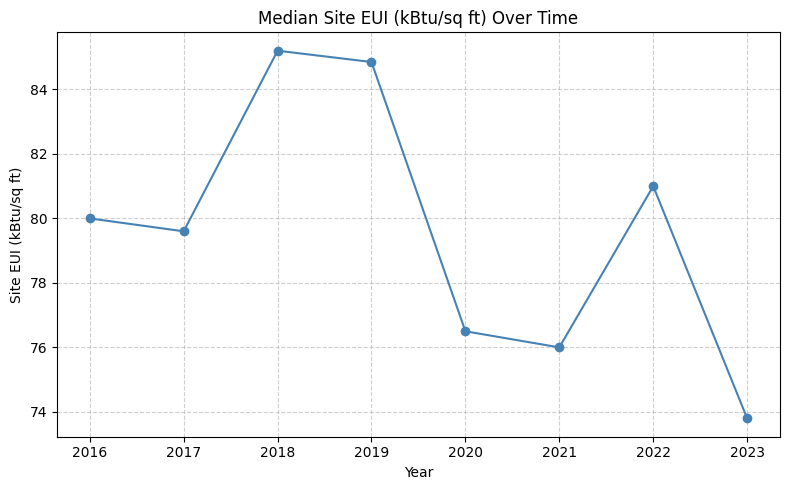

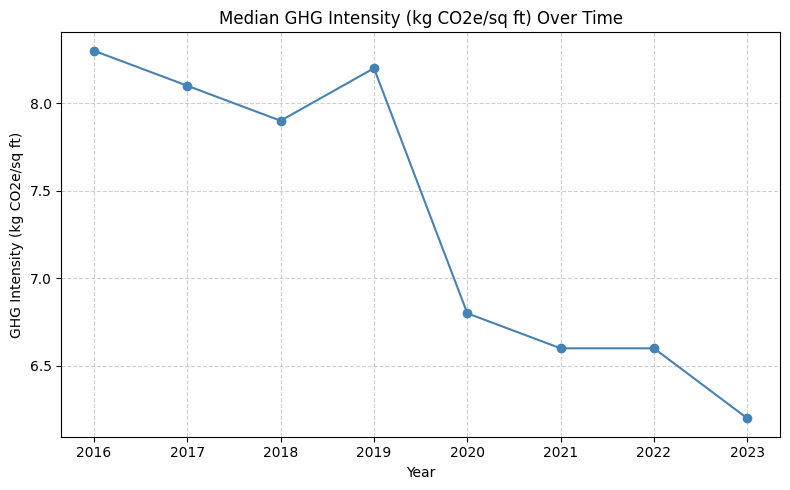

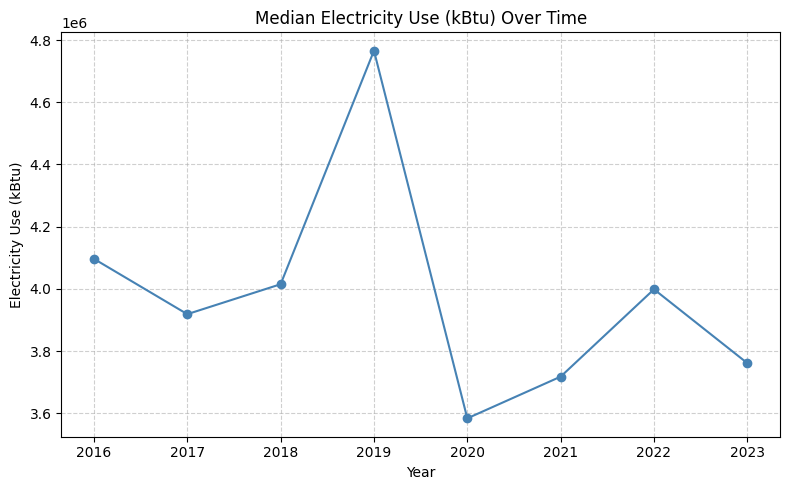

In [5]:
plots = plot_trend_by_year(
    energy_data,
    [
        "Site EUI (kBtu/sq ft)",
        "GHG Intensity (kg CO2e/sq ft)",
        "Electricity Use (kBtu)",
    ],
    agg="median",
)

The decreasing trends from line plots using medians (not pretty influenced by outliers) provide some evidence in building energy consumption changes after the implementation of Chicago's Energy Rating Placards. However, the decreasing of energy use could be influenced by historical events happening at the same period of time, eg: COVID. The real effect of Chicago's Energy Rating Placards need to be identified by a closer look and model evaluation of the dataset.